<a href="https://colab.research.google.com/github/jiseon0516/pdm19/blob/main/py-tensorflow/tf2_4_mnist_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [27]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [28]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) #categorical형태로 변환
y_test = to_categorical(y_test, 10)

## **FCN2**

In [29]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #입력을 평평하게 => 784
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [30]:
fcn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1894 - accuracy: 0.9452 - val_loss: 0.1276 - val_accuracy: 0.9617
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.1047 - val_accuracy: 0.9686
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9654 - val_loss: 0.0904 - val_accuracy: 0.9731
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0909 - accuracy: 0.9725 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.0797 - val_accuracy: 0.9759
Epoch 

In [32]:
fcn2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9790


[0.06686905771493912, 0.9789999723434448]

## **FCN3**

In [33]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [34]:
fcn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [35]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3509 - accuracy: 0.8950 - val_loss: 0.1298 - val_accuracy: 0.9588
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1500 - accuracy: 0.9558 - val_loss: 0.0955 - val_accuracy: 0.9703
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1117 - accuracy: 0.9672 - val_loss: 0.0782 - val_accuracy: 0.9747
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0884 - accuracy: 0.9734 - val_loss: 0.0766 - val_accuracy: 0.9753
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.0702 - val_accuracy: 0.9773
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0594 - accuracy: 0.9807 - val_loss: 0.0654 - val_accuracy: 0.9801
Epoch 

In [36]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9845


[0.0660644918680191, 0.984499990940094]

## **FCN4**

In [37]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [38]:
fcn4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)               

In [39]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.4134 - accuracy: 0.8761 - val_loss: 0.1422 - val_accuracy: 0.9570
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1768 - accuracy: 0.9504 - val_loss: 0.1042 - val_accuracy: 0.9672
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1309 - accuracy: 0.9627 - val_loss: 0.0953 - val_accuracy: 0.9699
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1114 - accuracy: 0.9674 - val_loss: 0.0805 - val_accuracy: 0.9742
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0942 - accuracy: 0.9723 - val_loss: 0.0808 - val_accuracy: 0.9767
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0816 - accuracy: 0.9762 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0743 - accuracy: 0.9783 - val_loss: 0.0719 - val_accuracy: 0.9795
Epoch 

In [40]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9808


[0.07218354195356369, 0.9807999730110168]

## **FCN5**

In [41]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [42]:
fcn5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               200960    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

In [43]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.5934 - accuracy: 0.8191 - val_loss: 0.1671 - val_accuracy: 0.9520
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2292 - accuracy: 0.9406 - val_loss: 0.1177 - val_accuracy: 0.9670
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1771 - accuracy: 0.9552 - val_loss: 0.1030 - val_accuracy: 0.9714
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1443 - accuracy: 0.9632 - val_loss: 0.0938 - val_accuracy: 0.9742
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1257 - accuracy: 0.9680 - val_loss: 0.1000 - val_accuracy: 0.9730
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1091 - accuracy: 0.9722 - val_loss: 0.0877 - val_accuracy: 0.9764
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1004 - accuracy: 0.9735 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 

In [44]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9820


[0.08397091925144196, 0.9819999933242798]

# **[DIY] Hidden layer에 따른 정확도**

In [45]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9820


[0.08397091925144196, 0.9819999933242798]

In [46]:
fcn_result = [[0.0674, 0.9806], 
 [0.07000, 0.9828], 
 [0.0738, 0.9814], 
 [0.0868, 0.9818]]

In [47]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9806, 0.9828, 0.9814, 0.9818]

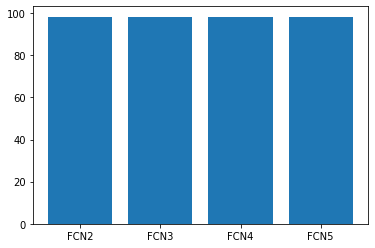

In [48]:
x = np.arange(4) #0~3
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # (98)%

plt.bar(x, accuracies)
plt.xticks(x, fcns)
# plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [49]:
fcn3.save('fcn3_best.hdf5')

In [50]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9845


[0.0660644918680191, 0.984499990940094]

---